# Env

In [ ]:
%cd /content
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

from google.colab import files
import os
import cv2
import dlib
import torch
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches

from yolov5 import utils
display = utils.notebook_init()
os.makedirs('/content/images', exist_ok=True)

YOLOv5 🚀 v7.0-128-gb96f35c Python-3.9.16 torch-1.13.1+cu116 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/107.7 GB disk)


# Detection

## YoLo v5

Here, we use YoLo v5 as an example for detection, which is easy to use

In [ ]:
%cd /content/yolov5
print("if you want to use the default images, just click `Cancel upload`")
uploaded = files.upload()
if len(uploaded) != 0:
  fnames = list(uploaded.keys())
  for fname in fnames:
    !mv $fname ../images/
!python detect.py --weights yolov5s.pt --img 256 --conf 0.25 --source ../images

/content/yolov5
if you want to use the default images, just click `Cancel upload`


Saving 00001.png to 00001.png
Saving 00010.png to 00010.png
detect: weights=['yolov5s.pt'], source=../images, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-128-gb96f35c Python-3.9.16 torch-1.13.1+cu116 CPU

100% 14.1M/14.1M [00:00<00:00, 123MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/images/00001.png: 256x256 1 person, 147.6ms
image 2/2 /content/images/00010.png: 256x256 1 person, 104.3ms
Speed: 0.8ms pre-process, 126.0ms inference, 15.7ms NMS per image at shape (1, 3, 256, 256)
Results saved to runs/detect/exp


## Dlib

Dlib is a useful library for face detection & face landmark detection

In [ ]:
## conda/pip install dlib
%cd /content
print("if you want to use the default images, just click `Cancel upload`")
uploaded = files.upload()
if len(uploaded) != 0:
  fnames = list(uploaded.keys())
  for fname in fnames:
    !mv $fname ../images/
fnames = [os.path.join('images', fname) for fname in os.listdir('images')]

/content
if you want to use the default images, just click `Cancel upload`


In [ ]:
print(fnames)

['images/00001.png', 'images/00010.png']


/content


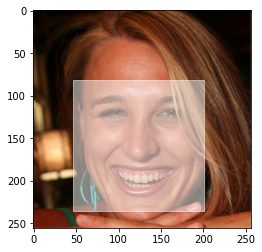

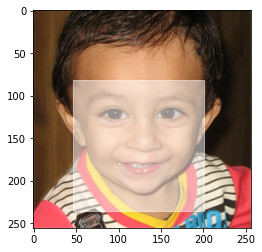

In [ ]:
%cd /content
'''
dlib.get_frontal_face_detector() is a function that returns a pre-trained object detector 
for detecting frontal faces in an image. The detector is based on a 
Histogram of Oriented Gradients (HOG) feature descriptor and a 
linear support vector machine (SVM) classifier.
'''
detector = dlib.get_frontal_face_detector()
for fname in fnames:
  img = cv2.imread(fname, cv2.IMREAD_COLOR)[..., ::-1]
  dets = detector(img, 1) # 1 means no upscaling
  for rec in dets:
    fig, ax = plt.subplots(1, 1)
    ax.imshow(img)
    l, r, u, b = np.maximum(rec.left(), 0), np.minimum(rec.right(), img.shape[1]), \
                 np.maximum(rec.top(), 0), np.minimum(rec.bottom(), img.shape[0])
    ax.add_patch(patches.Rectangle((l, u), r-l, b-u, color=(1,1,1,0.5)))
    plt.show()

# Segmentation

## DeepLab v3+

In [ ]:
%cd /content
!git clone https://github.com/VainF/DeepLabV3Plus-Pytorch
%cd DeepLabV3Plus-Pytorch
%pip install -r requirements.txt
os.makedirs('checkpoints', exist_ok=True)
if not os.path.isfile('./checkpoints/all.zip'):
  !wget -O ./checkpoints/all.zip https://www.dropbox.com/sh/w3z9z8lqpi8b2w7/AAB0vkl4F5vy6HdIhmRCTKHSa?dl=1
  !unzip ./checkpoints/all.zip -d ./checkpoints/

/content
Cloning into 'DeepLabV3Plus-Pytorch'...
remote: Enumerating objects: 705, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 705 (delta 24), reused 35 (delta 15), pack-reused 653
Receiving objects: 100% (705/705), 8.26 MiB | 36.17 MiB/s, done.
Resolving deltas: 100% (379/379), done.
/content/DeepLabV3Plus-Pytorch
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 4.7 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408216 sha256=0074bf4382c269eb7590557f9c933c3ff9be6000077837939feea4422763bb83
  Stored in directory: /root/.cache/pip/wheels/58/9e/14/30f7cc4dafdd4d602fb00ca33c6edd1424fc0f5df10a02e060
Successfully built visdom
--2023-03-26 07:01:31--  htt

In [ ]:
%cd /content/DeepLabV3Plus-Pytorch
print("if you want to use the default images, just click `Cancel upload`")
uploaded = files.upload()
if len(uploaded) != 0:
  fnames = list(uploaded.keys())
  for fname in fnames:
    !mv $fname ../images/
!python predict.py --input ../images --model deeplabv3plus_mobilenet --ckpt checkpoints/best_deeplabv3plus_mobilenet_voc_os16.pth --save_val_results_to test_results

/content/DeepLabV3Plus-Pytorch
if you want to use the default images, just click `Cancel upload`


Device: cpu
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100% 13.6M/13.6M [00:00<00:00, 70.2MB/s]
Resume model from checkpoints/best_deeplabv3plus_mobilenet_voc_os16.pth
100% 2/2 [00:00<00:00,  2.16it/s]


## Face Parsing

Face parsing is a special segmentation method, this time we use https://github.com/zllrunning/face-parsing.PyTorch.
And we have modified the code for running on CPU.

In [35]:
%cd ..
%rm -rf ./face-parsing.PyTorch

/content


In [36]:
%cd /content
!git clone https://github.com/Awenbocc/face-parsing.PyTorch
%cd face-parsing.PyTorch
os.makedirs('res/cp', exist_ok=True)
if not os.path.isfile('./res/cp/79999_iter.pth'):
  !wget -O /content/face-parsing.PyTorch/res/cp/79999_iter.pth https://drive.google.com/u/0/uc?id=154JgKpzCPW82qINcVieuPH3fZ2e0P812&export=download

/content
Cloning into 'face-parsing.PyTorch'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 98 (delta 25), reused 17 (delta 17), pack-reused 63
Unpacking objects: 100% (98/98), 3.06 MiB | 10.49 MiB/s, done.
/content/face-parsing.PyTorch
--2023-03-26 08:13:30--  https://drive.google.com/u/0/uc?id=154JgKpzCPW82qINcVieuPH3fZ2e0P812
Resolving drive.google.com (drive.google.com)... 74.125.26.113, 74.125.26.102, 74.125.26.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.26.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=154JgKpzCPW82qINcVieuPH3fZ2e0P812 [following]
--2023-03-26 08:13:30--  https://drive.google.com/uc?id=154JgKpzCPW82qINcVieuPH3fZ2e0P812
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-1s-docs.googleusercontent

In [37]:
%cd /content/face-parsing.PyTorch

print("if you want to use the default images, just click `Cancel upload`")
uploaded = files.upload()
if len(uploaded) != 0:
  fnames = list(uploaded.keys())
  for fname in fnames:
    !mv $fname ../images/

!python test.py

/content/face-parsing.PyTorch
if you want to use the default images, just click `Cancel upload`


running
done
[ 0  1  2  3  4  5  8  9 10 11 12 13 14 15 16 17]
[ 0  1  2  3  4  5  7  8 10 11 12 13 14 16 17]
